In [32]:
#FEATURE ENGINEERING (RFM MODEL)
#Goal: Convert transaction-level data → customer-level intelligence

'''
Why clustering cannot work on raw transactions

What feature engineering really means

What RFM is and why businesses trust it

How to build a one-row-per-customer dataset

'''

'\nWhy clustering cannot work on raw transactions\n\nWhat feature engineering really means\n\nWhat RFM is and why businesses trust it\n\nHow to build a one-row-per-customer dataset\n\n'

In [33]:
#import libraries
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.2f}".format)


In [34]:
#load cleaned data 

PROJECT_ROOT = r"C:\Users\CORE\Desktop\customer_segmentation"
DATA_DIR = os.path.join(PROJECT_ROOT, "data")

for file in os.listdir(DATA_DIR):
    if file.lower().endswith(".csv"):
        df = pd.read_csv(os.path.join(DATA_DIR, file), encoding="ISO-8859-1")
        break
    elif file.lower().endswith((".xls", ".xlsx")):
        df = pd.read_excel(os.path.join(DATA_DIR, file))
        break


In [35]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [36]:
# Right now one customers appears in many rows , clustering requires one row = one entity 
# therefore we must aggregrate transactions per customers 

#This process is called aas Feature Engineering 

In [37]:
#INtroduction to RFM 
'''
What is RFM?

RFM stands for:

Metric	    Meaning	                    Business Question
Recency  	Days since last purchase	Is the customer active?
Frequency	Number of purchases	        Is the customer loyal?
Monetary	Total spend	                Is the customer valuable?

RFM is used by:

Amazon
Retail brands
Banks
Subscription companies

'''

'\nWhat is RFM?\n\nRFM stands for:\n\nMetric\t    Meaning\t                    Business Question\nRecency  \tDays since last purchase\tIs the customer active?\nFrequency\tNumber of purchases\t        Is the customer loyal?\nMonetary\tTotal spend\t                Is the customer valuable?\n\nRFM is used by:\n\nAmazon\nRetail brands\nBanks\nSubscription companies\n\n'

In [38]:
#CREATE REVENUE
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.00,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.00,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.00,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.00,France,16.60


In [39]:
#DEFINE SNAPSHOT DATE
#What is snapshot date?  It is the reference date from which we measure recency.

In [40]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [41]:
df["InvoiceDate"].dtype


dtype('<M8[ns]')

In [42]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [43]:
df["InvoiceDate"].max()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [44]:
'''
The error occurred because the InvoiceDate column was of type string. Since time-based operations require datetime objects, I converted the column using pd.to_datetime() before calculating the snapshot date for recency analysis

InvoiceDate was a string

Python cannot add time to text

✅ Why fix works

pd.to_datetime() converts text → real date

Dates can be added/subtracted safely '''

'\nThe error occurred because the InvoiceDate column was of type string. Since time-based operations require datetime objects, I converted the column using pd.to_datetime() before calculating the snapshot date for recency analysis\n\nInvoiceDate was a string\n\nPython cannot add time to text\n\n✅ Why fix works\n\npd.to_datetime() converts text → real date\n\nDates can be added/subtracted safely '

In [45]:
df[["CustomerID", "InvoiceDate", "InvoiceNo", "Revenue"]].head()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [46]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
snapshot_date


Timestamp('2011-12-10 12:50:00')

In [47]:
#core rfm aggregration 

rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "nunique",
    "Revenue": "sum"
}).reset_index()



#df.groupby("CustomerID") - “Take all rows belonging to the same customer and treat them as one group.” , CustomerID = 17850 appears in 40 rows
#.agg({..}) summarize each customers transactions into meaningful numbers 
''' 
"InvoiceDate": lambda x: (snapshot_date - x.max()).days x is all invoicedate values for one cuatomer 
for eg:  x = [
  2011-11-10,
  2011-11-25,
  2011-12-05
]

what does x.max() do ?   # x.max() = 2011-12-05 '''

# What does snapshot calculation do? snapshot_date - x.max()
# .days converts timedelta -> integer days
#frequency : "InvoiceNo": "nunique" why nunique -> one invoice can have multiple products , counting rows would be wrong , unique invoice count = number of purchases 

#.reset_index() --> customerid becomes an index 

' \n"InvoiceDate": lambda x: (snapshot_date - x.max()).days x is all invoicedate values for one cuatomer \nfor eg:  x = [\n  2011-11-10,\n  2011-11-25,\n  2011-12-05\n]\n\nwhat does x.max() do ?   # x.max() = 2011-12-05 '

In [48]:
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


In [49]:
rfm.head()  #verify rfm table


,CustomerID,Recency,Frequency,Monetary
0,12346.00,326,2,0.00
1,12347.00,2,7,4310.00
2,12348.00,75,4,1797.24
3,12349.00,19,1,1757.55
4,12350.00,310,1,334.40


In [50]:
rfm.shape  #Rows = number of unique customers


(4372, 4)

In [51]:
rfm.isnull().sum()
#missing values

CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64

In [52]:
rfm.describe()
#distribution check

,CustomerID,Recency,Frequency,Monetary
count,4372.00,4372.00,4372.00,4372.00
mean,15299.68,92.05,5.08,1898.46
std,1722.39,100.77,9.34,8219.35
min,12346.00,1.00,1.00,-4287.63
25%,13812.75,17.00,1.00,293.36
50%,15300.50,50.00,3.00,648.08
75%,16778.25,143.00,5.00,1611.72
max,18287.00,374.00,248.00,279489.02


In [ ]:
#I engineered customer-level RFM features by aggregating transaction data per customer. Recency was calculated as days since last purchase using a snapshot date, frequency as unique invoice count, and monetary value as total revenue

In [53]:
'''DAY 5 OBJECTIVE (READ FIRST)

By the end of Day 5, you will understand:

Why raw RFM values cannot be used in clustering

What feature scaling actually means

Why K-Means requires scaling

How StandardScaler works internally

How to prepare ML-ready input data '''

'DAY 5 OBJECTIVE (READ FIRST)\n\nBy the end of Day 5, you will understand:\n\nWhy raw RFM values cannot be used in clustering\n\nWhat feature scaling actually means\n\nWhy K-Means requires scaling\n\nHow StandardScaler works internally\n\nHow to prepare ML-ready input data '

In [54]:
from sklearn.preprocessing import StandardScaler
#sklearn = machine learning library
#standardscaler = industry standard for k means 

In [55]:
rfm_features = rfm[["Recency", "Frequency", "Monetary"]]


In [56]:
scaler = StandardScaler()


In [58]:
rfm_scaled = scaler.fit_transform(rfm_features)
'''
fit()

Calculates mean & std for each feature

transform()

Applies scaling formula
'''

'\nfit()\n\nCalculates mean & std for each feature\n\ntransform()\n\nApplies scaling formula\n'

In [60]:
type(rfm_scaled)


numpy.ndarray

In [61]:
rfm_scaled_df = pd.DataFrame(
    rfm_scaled,
    columns=["Recency", "Frequency", "Monetary"]
)


In [62]:
rfm_scaled_df.describe()


,Recency,Frequency,Monetary
count,4372.00,4372.00,4372.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-0.90,-0.44,-0.75
25%,-0.74,-0.44,-0.20
50%,-0.42,-0.22,-0.15
75%,0.51,-0.01,-0.03
max,2.80,26.02,33.78


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>, <Axes: >]], dtype=object)

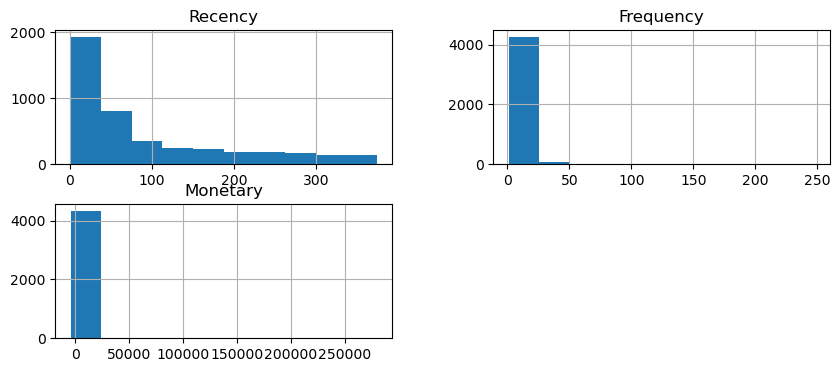

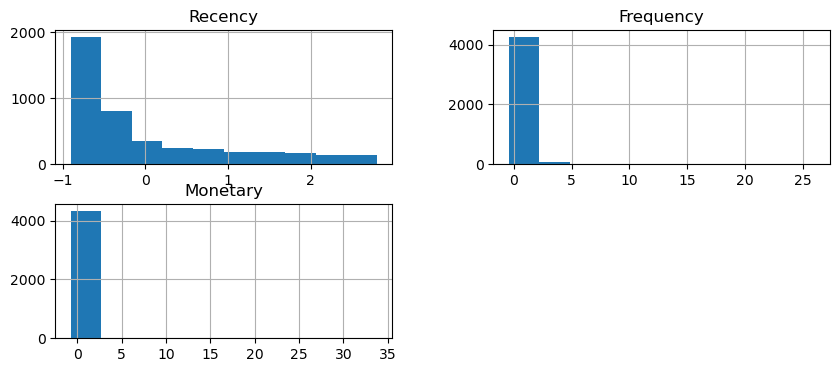

In [63]:
rfm_features.hist(figsize=(10, 4))
rfm_scaled_df.hist(figsize=(10, 4))


In [ ]:
#Since K-Means is distance-based, I standardized the RFM features using StandardScaler to ensure equal contribution from recency, frequency, and monetary values before clustering

In [ ]:
''' input: Scaled RFM data
Output: Customer segments (clusters)

DAY 6 OBJECTIVE (READ FIRST)

By the end of Day 6, you will clearly understand:

What clustering really means

Why K-Means is suitable here

How K-Means works internally (intuition)

How to choose the right number of clusters (K)

How customers get assigned to clusters '''



WHAT IS CLUSTERING?

Clustering means:

Grouping customers so that
customers in the same group are similar,
customers in different groups are different


WHY K-MEANS FOR CUSTOMER SEGMENTATION?
K-Means is ideal because:

Reason        	    Explanation
Distance-based	    Perfect for RFM
Fast & scalable	    Handles thousands of customers
Interpretable	    Easy to explain to business
Industry-standard	Used in retail & marketing


HOW K-MEANS WORKS (INTUITION, NOT MATH)

K-Means repeats 3 simple steps:

1️⃣ Choose K cluster centers (randomly)
2️⃣ Assign each customer to the nearest center
3️⃣ Recalculate centers as the mean of assigned customers

Repeat until centers stop moving.

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
#PREPARE DATA FOR CLUSTERING

#We use scaled RFM features only:

X = rfm_scaled_df.copy()


In [ ]:
#choosing the right number of clusters 
'''too few clusters - over generalization 
too many clusters - over segmentation , hard to explain

We use the Elbow Method.

It measures:

Within-Cluster Sum of Squares (WCSS)
→ how compact clusters are

Lower WCSS = tighter clusters
'''

In [66]:
#CALCULATE WCSS FOR MULTIPLE K

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#What is inertia_? Total distance of points from their cluster centers , Lower = better fit


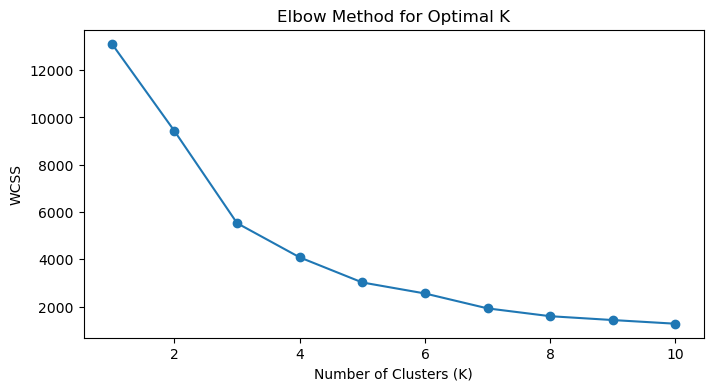

In [67]:
#plot elbow curve

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()



#sharp bend (like an elbow) 
#after this point --> improvement slow down typical k values 3 , 4 or 5 

In [68]:
#train final k means model

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)


#fit_predict() --> fits the model , assigns cluster number to each customers 


In [69]:
#add clusters to rfm table

rfm["Cluster"] = clusters


In [70]:
#CHECK CLUSTER DISTRIBUTION
rfm["Cluster"].value_counts()  #size of each segment


Cluster
3    3090
1    1077
0     194
2      11
Name: count, dtype: int64

In [72]:
#Compute average RFM per cluster
cluster_profile = rfm.groupby("Cluster").mean()
cluster_profile


,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15184.87,10.75,28.51,12168.26
1,15353.23,248.93,1.81,455.11
2,15289.09,5.09,109.91,124312.31
3,15288.26,42.78,4.37,1320.98


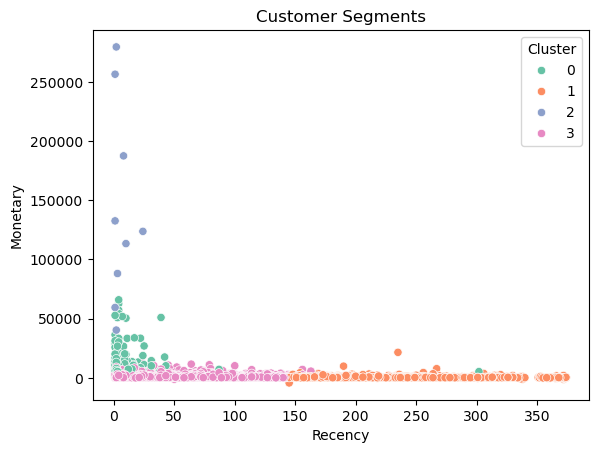

In [73]:
sns.scatterplot(
    x=rfm["Recency"],
    y=rfm["Monetary"],
    hue=rfm["Cluster"],
    palette="Set2"
)
plt.title("Customer Segments")
plt.show()


In [ ]:
#I used K-Means clustering on standardized RFM features. The optimal number of clusters was determined using the Elbow Method, and customers were segmented based on similarity in recency, frequency, and monetary behavior

In [ ]:
#BUSINESS INTERPRETATION & CUSTOMER SEGMENT NAMING

In [ ]:
'''Input: RFM table + Cluster labels
Output: Business-meaningful customer segments with clear actions

DAY 7 OBJECTIVE (READ THIS FIRST)

By the end of Day 7, you will be able to:

Understand what each cluster actually represents

Translate numbers into human-readable customer types

Assign clear names to each segment
 '''

In [74]:
#REVISIT CLUSTER PROFILES

cluster_profile = rfm.groupby("Cluster").mean()
cluster_profile


,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15184.87,10.75,28.51,12168.26
1,15353.23,248.93,1.81,455.11
2,15289.09,5.09,109.91,124312.31
3,15288.26,42.78,4.37,1320.98


In [ ]:
#UNDERSTAND EACH METRIC

'''
Before interpreting clusters, remind yourself:

🔹 Recency

Lower = better

Low recency → customer bought recently

🔹 Frequency

Higher = better

High frequency → repeat customer

🔹 Monetary

Higher = better

High monetary → valuable customer
'''

In [76]:
#create a segment maooing

segment_map = {
    0: "Loyal High-Value Customers",
    1: "At-Risk Customers",
    2: "New / Potential Customers",
    3: "Regular Customers"
}

rfm["Segment"] = rfm["Cluster"].map(segment_map)



In [77]:
rfm["Segment"].value_counts()

Segment
Regular Customers             3090
At-Risk Customers             1077
Loyal High-Value Customers     194
New / Potential Customers       11
Name: count, dtype: int64

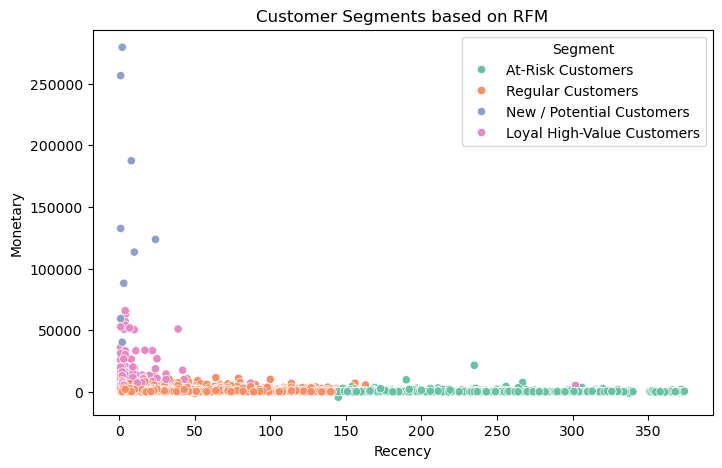

In [79]:
#Recency vs Monetary
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=rfm,
    x="Recency",
    y="Monetary",
    hue="Segment",
    palette="Set2"
)
plt.title("Customer Segments based on RFM")
plt.show()


In [ ]:
#We segmented customers into four groups based on purchasing behavior. Loyal customers contribute the highest revenue and should be retained with premium offers. At-risk customers require re-engagement campaigns, while new customers represent growth opportunities.

In [ ]:
#DASHBOARD & VISUALIZATION

'''Input: Final RFM + Segment data
Output: Business-friendly dashboard (decision-ready)

DAY 8 OBJECTIVE (READ THIS FIRST)

By the end of Day 8, you will understand:

Why dashboards are critical in real companies

What KPIs businesses expect from segmentation

How to design a clean analytical dashboard

How to build it step-by-step (Python-based)

How to explain it confidently in interviews'''

In [80]:
rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.00,326,2,0.00,1,At-Risk Customers
1,12347.00,2,7,4310.00,3,Regular Customers
2,12348.00,75,4,1797.24,3,Regular Customers
3,12349.00,19,1,1757.55,3,Regular Customers
4,12350.00,310,1,334.40,1,At-Risk Customers


In [81]:
#customer count per segment 

segment_counts = rfm["Segment"].value_counts()

segment_counts


Segment
Regular Customers             3090
At-Risk Customers             1077
Loyal High-Value Customers     194
New / Potential Customers       11
Name: count, dtype: int64

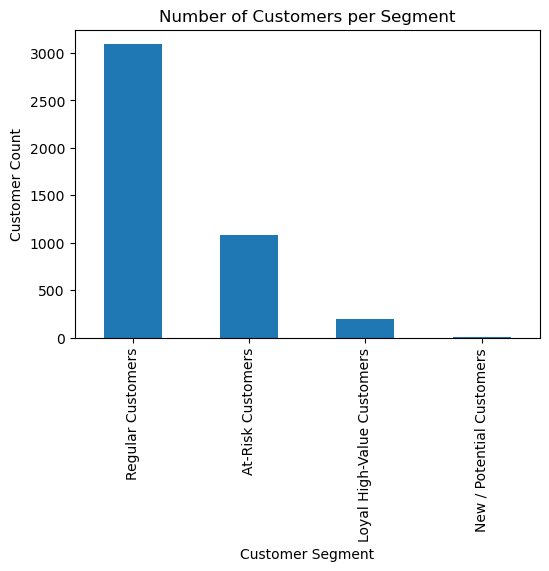

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
segment_counts.plot(kind="bar")
plt.title("Number of Customers per Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Customer Count")
plt.show()


In [83]:
# Revenue contribution by segment 

segment_revenue = rfm.groupby("Segment")["Monetary"].sum().sort_values(ascending=False)

segment_revenue


Segment
Regular Customers            4081832.85
Loyal High-Value Customers   2360643.35
New / Potential Customers    1367435.37
At-Risk Customers             490154.24
Name: Monetary, dtype: float64

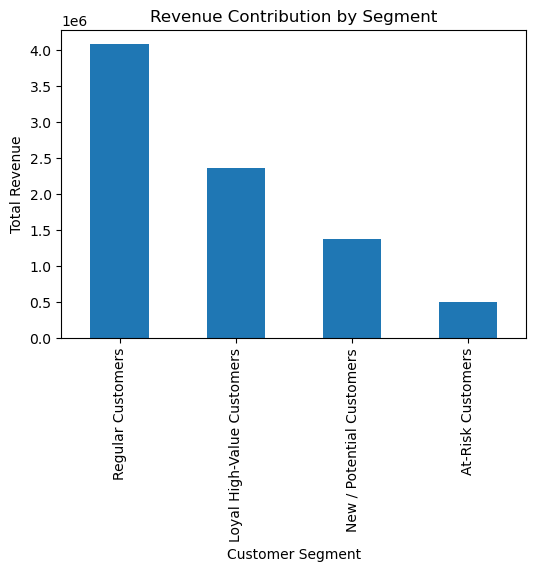

In [84]:
plt.figure(figsize=(6, 4))
segment_revenue.plot(kind="bar")
plt.title("Revenue Contribution by Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.show()


In [85]:
#AVERAGE RFM METRICS BY SEGMENT

segment_profile = rfm.groupby("Segment")[["Recency", "Frequency", "Monetary"]].mean()
segment_profile


,Recency,Frequency,Monetary
Segment,,,
At-Risk Customers,248.93,1.81,455.11
Loyal High-Value Customers,10.75,28.51,12168.26
New / Potential Customers,5.09,109.91,124312.31
Regular Customers,42.78,4.37,1320.98


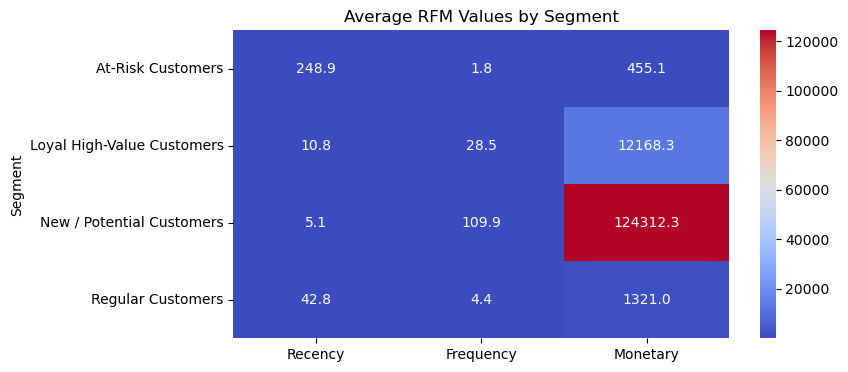

In [86]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(segment_profile, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average RFM Values by Segment")
plt.show()


In [ ]:
#CUSTOMER BEHAVIOR SCATTER PLOTS

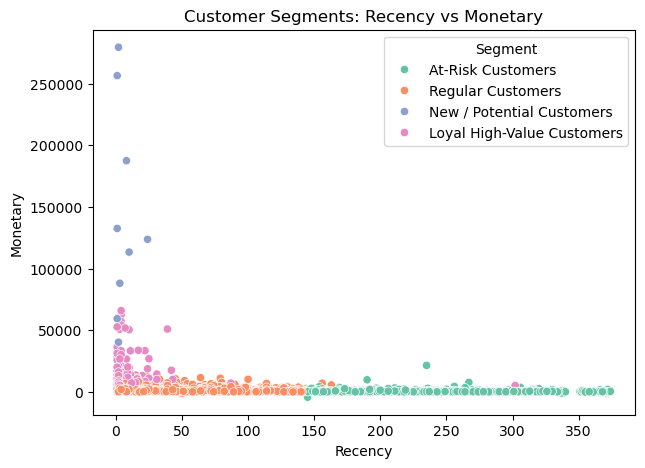

In [87]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=rfm,
    x="Recency",
    y="Monetary",
    hue="Segment",
    palette="Set2"
)
plt.title("Customer Segments: Recency vs Monetary")
plt.show()


In [ ]:
# After segmenting customers, I built a dashboard to visualize customer distribution, revenue contribution, and behavioral differences across segments. This allowed stakeholders to quickly identify high-value and at-risk customers and design targeted marketing strategies.

In [88]:
rfm_final = rfm[[
    "CustomerID",
    "Recency",
    "Frequency",
    "Monetary",
    "Segment"
]]

rfm_final.head()


,CustomerID,Recency,Frequency,Monetary,Segment
0,12346.00,326,2,0.00,At-Risk Customers
1,12347.00,2,7,4310.00,Regular Customers
2,12348.00,75,4,1797.24,Regular Customers
3,12349.00,19,1,1757.55,Regular Customers
4,12350.00,310,1,334.40,At-Risk Customers


In [90]:
rfm_final.to_csv(
    "customer_segmentation_powerbi.csv",
    index=False
)


In [91]:
import os
os.getcwd()


'C:\\Users\\CORE\\Desktop\\customer_segmentation\\notebook'